# MACHINE LEARNING PROJECT

## BATCH 15:
### NIKHIL NITIN JAIN (RA2211003011484)
### RAHUL GHOSH       (RA2211003011501)
### SRI RAKSHID       (RA2211003011510)

Saving dataset1.txt to dataset1 (4).txt
Column names: Index(['ID', 'Timestamp', 'Latitude', 'Longitude'], dtype='object')
First few rows of data:
      id           timestamp   latitude  longitude
0  David 2020-07-04 15:35:30  13.148953  77.593651
1  David 2020-07-04 16:35:30  13.222397  77.652828
2  Frank 2020-07-04 14:35:30  13.236507  77.693792
3  Carol 2020-07-04 21:35:30  13.163716  77.562842
4   Ivan 2020-07-04 22:35:30  13.232095  77.580273


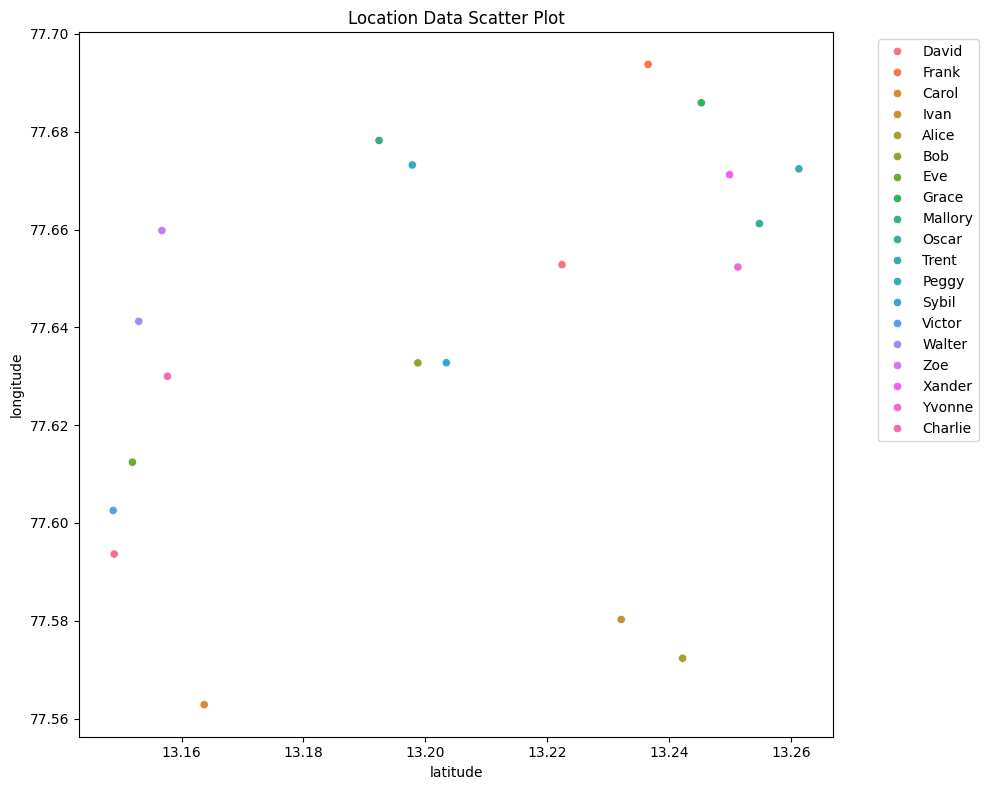

Infected names associated with David: ['Frank', 'Carol', 'Ivan', 'Alice', 'Bob', 'Eve', 'Grace', 'Mallory', 'Oscar', 'Trent', 'Peggy', 'Sybil', 'Victor', 'Walter', 'Zoe', 'Xander', 'Yvonne', 'Charlie']


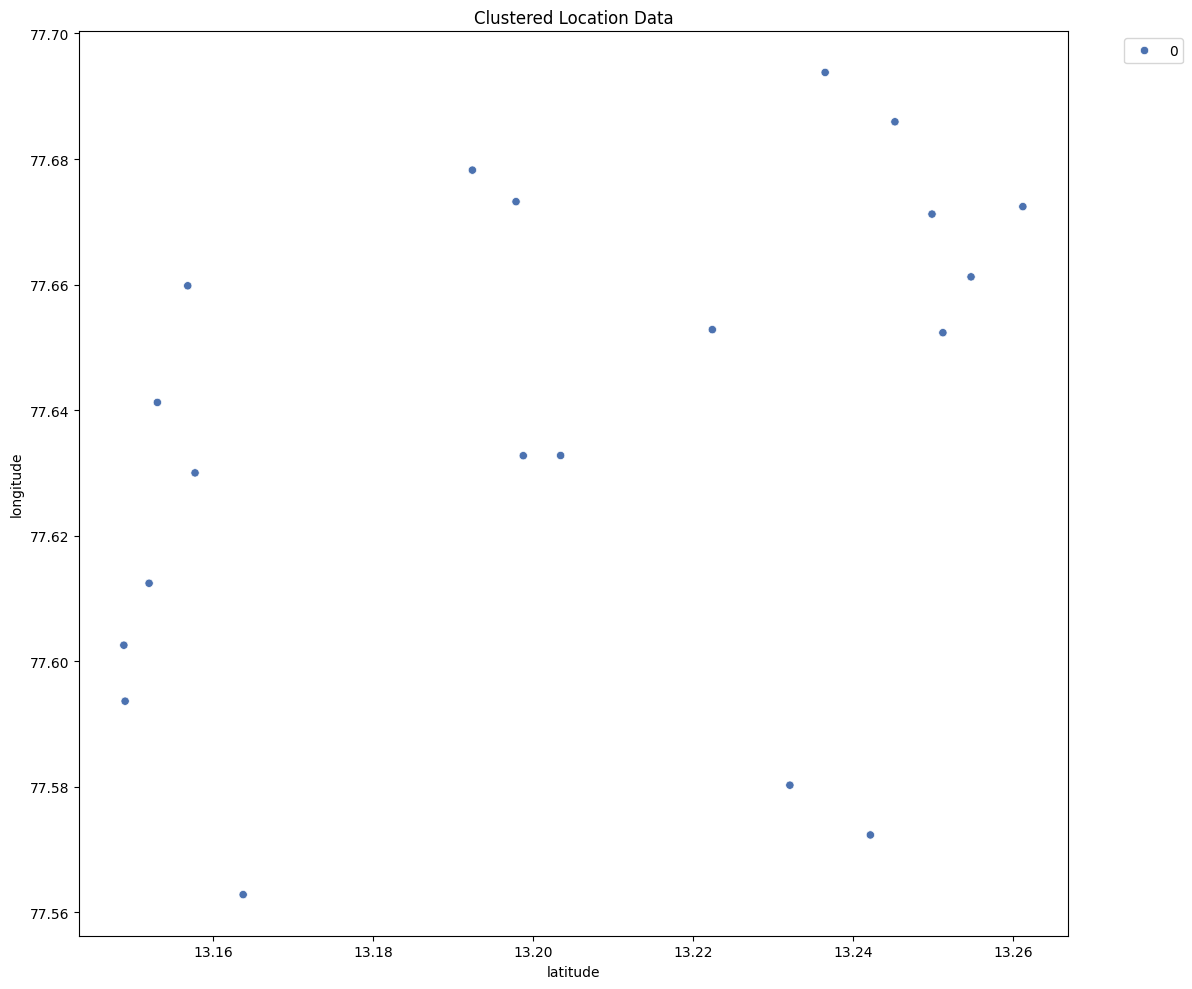

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from google.colab import files

# Upload text file
uploaded = files.upload()

# Get the file name
file_name = list(uploaded.keys())[0]

# Read the file, assuming it's comma-separated
df = pd.read_csv(file_name)

# Check if the DataFrame has the correct columns
print("Column names:", df.columns)

# Rename columns if needed to match expected names
df.columns = ['id', 'timestamp', 'latitude', 'longitude']

# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Display the first few rows
print("First few rows of data:")
print(df.head())

# Define epsilon (6 feet in kilometers)
epsilon = 0.0018288

# Plot the data points
plt.figure(figsize=(10, 8))
sns.scatterplot(x='latitude', y='longitude', data=df, hue='id')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Location Data Scatter Plot')
plt.tight_layout()
plt.show()

def get_infected_names(input_name, df, labels):
    infected_names = []
    unique_clusters = set(labels)

    if -1 in unique_clusters:
        unique_clusters.remove(-1)  # Remove noise points

    for cluster in unique_clusters:
        ids_in_cluster = df.loc[labels == cluster, 'id']
        for member_id in ids_in_cluster:
            if (member_id not in infected_names) and (member_id != input_name):
                infected_names.append(member_id)

    return infected_names

# Apply DBSCAN clustering
coords = df[['latitude', 'longitude']].values.astype(float)
model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(np.radians(coords))
labels = model.labels_

# Add cluster labels to the dataframe
df['cluster'] = labels

# Call the function to get infected names
input_name = "David"
infected_names = get_infected_names(input_name, df, labels)
print(f"Infected names associated with {input_name}:", infected_names)

# Plot clusters
plt.figure(figsize=(12, 10))
sns.scatterplot(x='latitude', y='longitude', hue='cluster', data=df, palette='deep')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Clustered Location Data')
plt.tight_layout()
plt.show()


Saving dataset2.txt to dataset2 (5).txt
Column names: Index(['ID', 'Timestamp', 'Latitude', 'Longitude'], dtype='object')
First few rows of data:
        id           timestamp   latitude  longitude
0     Alex 2020-07-10 09:00:00  13.152871  77.602431
1    Bella 2020-07-10 09:30:00  13.152891  77.602421
2  Cameron 2020-07-10 10:15:00  13.182125  77.652423
3    Diana 2020-07-10 10:45:00  13.182145  77.652413
4    Elena 2020-07-10 11:20:00  13.162871  77.602451


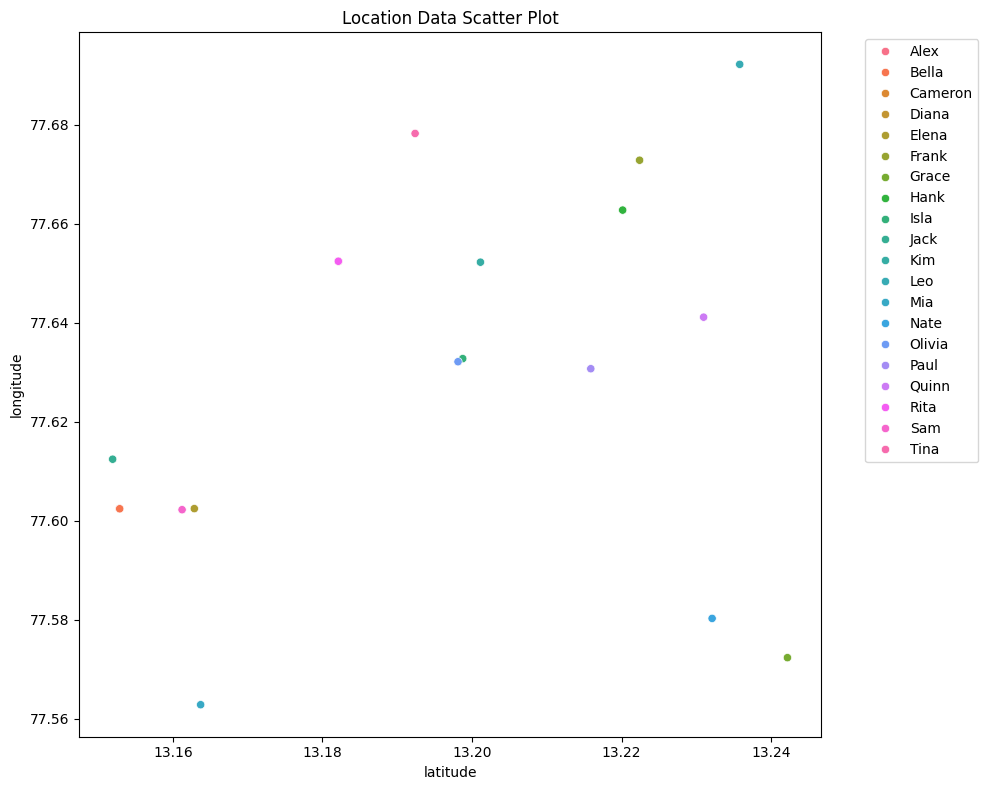

Available IDs in dataset: ['Alex' 'Bella' 'Cameron' 'Diana' 'Elena' 'Frank' 'Grace' 'Hank' 'Isla'
 'Jack' 'Kim' 'Leo' 'Mia' 'Nate' 'Olivia' 'Paul' 'Quinn' 'Rita' 'Sam'
 'Tina']
Error: 'David' not found in the dataset.
No infected names found or the input user is in noise.


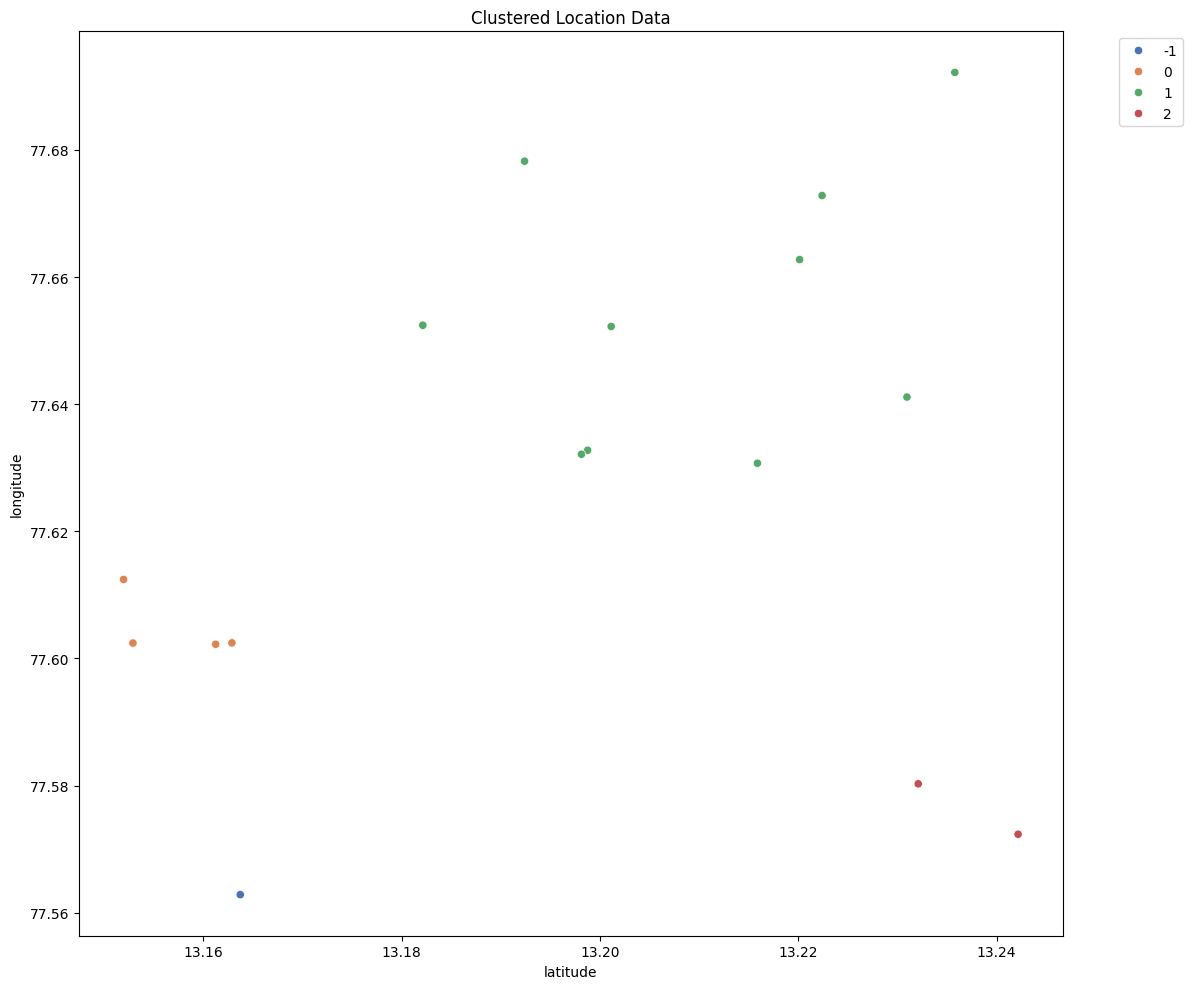

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from google.colab import files

# Upload text file
uploaded = files.upload()

# Get the file name
file_name = list(uploaded.keys())[0]

# Read the file, assuming it's comma-separated (adjust this if necessary)
df = pd.read_csv(file_name)

# Check if the DataFrame has the correct columns
print("Column names:", df.columns)

# Rename columns if needed to match expected names
df.columns = ['id', 'timestamp', 'latitude', 'longitude']

# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Display the first few rows
print("First few rows of data:")
print(df.head())

# Define epsilon (6 feet in kilometers), convert feet to radians for DBSCAN
epsilon = 0.0005  # This is based on the approx conversion from feet to degrees

# Plot the data points
plt.figure(figsize=(10, 8))
sns.scatterplot(x='latitude', y='longitude', data=df, hue='id')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Location Data Scatter Plot')
plt.tight_layout()
plt.show()

# Apply DBSCAN clustering
coords = df[['latitude', 'longitude']].values.astype(float)
model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(np.radians(coords))
labels = model.labels_

# Add cluster labels to the dataframe
df['cluster'] = labels

# Get the unique clusters (excluding noise)
unique_clusters = set(labels)
unique_clusters.discard(-1)  # Remove noise points (label -1)

# Print all unique IDs in the dataset to avoid errors with input_name
print("Available IDs in dataset:", df['id'].unique())

# Function to get infected names based on proximity
def get_infected_names(input_name, df, labels):
    # Check if the input name exists in the dataset
    if input_name not in df['id'].values:
        print(f"Error: '{input_name}' not found in the dataset.")
        return []

    # Get the cluster label for the input name
    input_cluster = df.loc[df['id'] == input_name, 'cluster'].values[0]

    # If the input name is in the noise category (-1), return empty list
    if input_cluster == -1:
        print(f"Error: '{input_name}' is considered as noise (no cluster).")
        return []

    # Find the users in the same cluster as the input name (excluding the input name itself)
    infected_names = df.loc[(df['cluster'] == input_cluster) & (df['id'] != input_name), 'id'].tolist()

    return infected_names

# Call the function to get infected names
input_name = "David"  # You can replace this with any user ID
infected_names = get_infected_names(input_name, df, labels)
if infected_names:
    print(f"Infected names associated with {input_name}: {infected_names}")
else:
    print("No infected names found or the input user is in noise.")

# Plot clusters with color for each cluster
plt.figure(figsize=(12, 10))
sns.scatterplot(x='latitude', y='longitude', hue='cluster', data=df, palette='deep')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Clustered Location Data')
plt.tight_layout()
plt.show()


Saving dataset2.txt to dataset2 (6).txt
Column names: Index(['ID', 'Timestamp', 'Latitude', 'Longitude'], dtype='object')
First few rows of data:
        id           timestamp   latitude  longitude
0     Alex 2020-07-10 09:00:00  13.152871  77.602431
1    Bella 2020-07-10 09:30:00  13.152891  77.602421
2  Cameron 2020-07-10 10:15:00  13.182125  77.652423
3    Diana 2020-07-10 10:45:00  13.182145  77.652413
4    Elena 2020-07-10 11:20:00  13.162871  77.602451


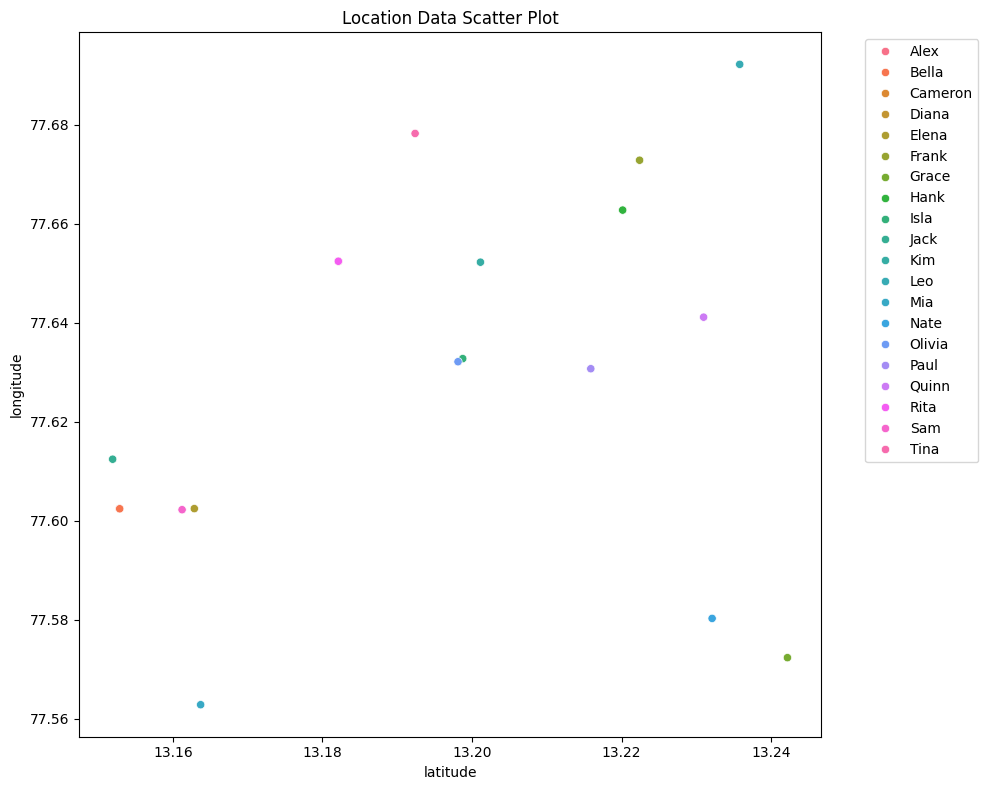

Available IDs in dataset: ['Alex' 'Bella' 'Cameron' 'Diana' 'Elena' 'Frank' 'Grace' 'Hank' 'Isla'
 'Jack' 'Kim' 'Leo' 'Mia' 'Nate' 'Olivia' 'Paul' 'Quinn' 'Rita' 'Sam'
 'Tina']
Infected names associated with Alex: ['Bella']


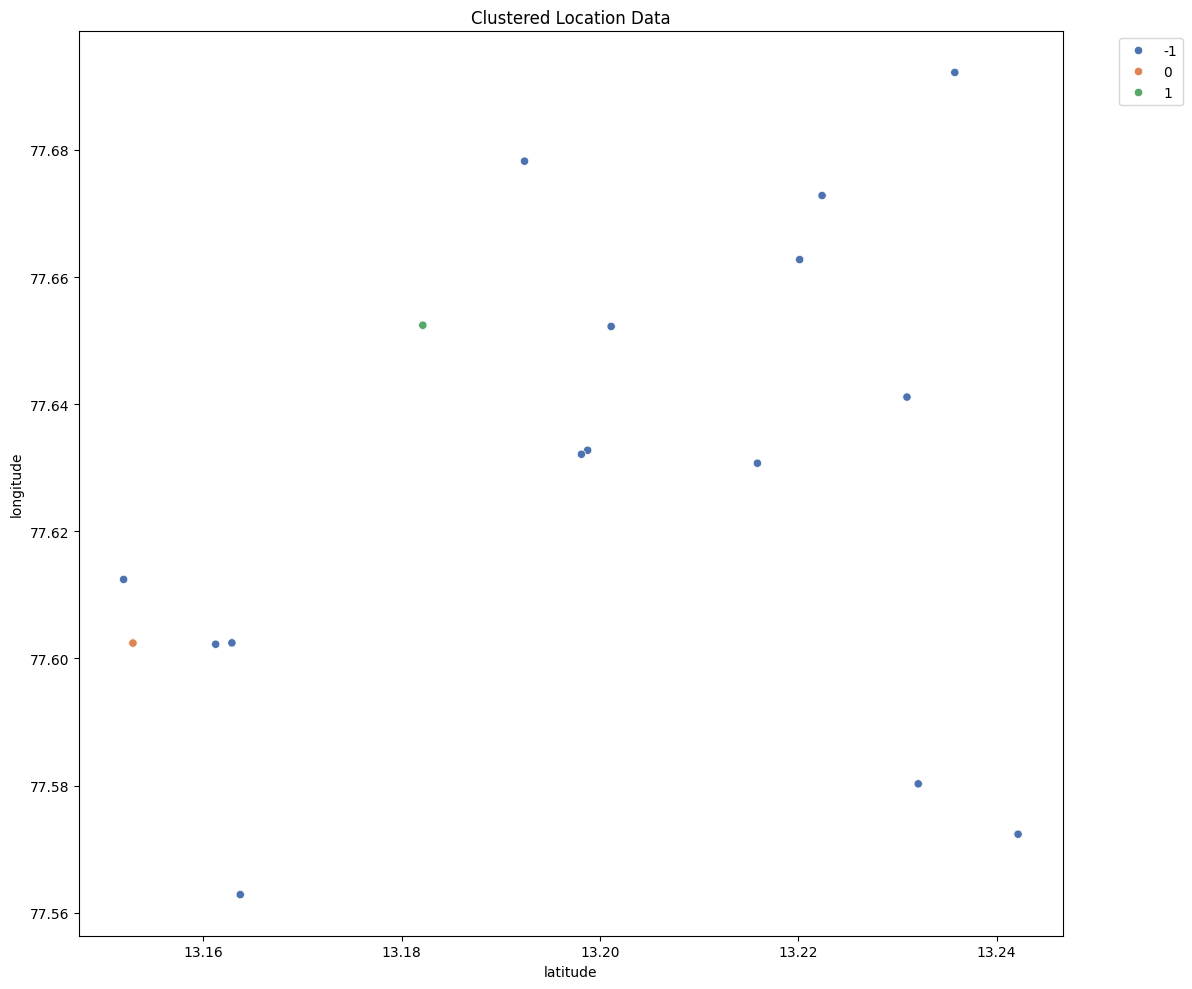

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from google.colab import files

# Upload text file
uploaded = files.upload()

# Get the file name
file_name = list(uploaded.keys())[0]

# Read the file, assuming it's comma-separated (adjust this if necessary)
df = pd.read_csv(file_name)

# Check if the DataFrame has the correct columns
print("Column names:", df.columns)

# Rename columns if needed to match expected names
df.columns = ['id', 'timestamp', 'latitude', 'longitude']

# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Display the first few rows
print("First few rows of data:")
print(df.head())

# Define epsilon (in radians, this corresponds to 10 meters)
# Approximate conversion from meters to radians: 1 meter ≈ 1/6371000 radians
epsilon = 10 / 6371000  # epsilon = 10 meters in radians (approximately)

# Plot the data points
plt.figure(figsize=(10, 8))
sns.scatterplot(x='latitude', y='longitude', data=df, hue='id')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Location Data Scatter Plot')
plt.tight_layout()
plt.show()

# Apply DBSCAN clustering with an adjusted epsilon and min_samples
coords = df[['latitude', 'longitude']].values.astype(float)
model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(np.radians(coords))
labels = model.labels_

# Add cluster labels to the dataframe
df['cluster'] = labels

# Get the unique clusters (excluding noise)
unique_clusters = set(labels)
unique_clusters.discard(-1)  # Remove noise points (label -1)

# Print all unique IDs in the dataset to avoid errors with input_name
print("Available IDs in dataset:", df['id'].unique())

# Function to get infected names based on proximity
def get_infected_names(input_name, df, labels):
    # Check if the input name exists in the dataset
    if input_name not in df['id'].values:
        print(f"Error: '{input_name}' not found in the dataset.")
        return []

    # Get the cluster label for the input name
    input_cluster = df.loc[df['id'] == input_name, 'cluster'].values[0]

    # If the input name is in the noise category (-1), return empty list
    if input_cluster == -1:
        print(f"Error: '{input_name}' is considered as noise (no cluster).")
        return []

    # Find the users in the same cluster as the input name (excluding the input name itself)
    infected_names = df.loc[(df['cluster'] == input_cluster) & (df['id'] != input_name), 'id'].tolist()

    return infected_names

# Call the function to get infected names
input_name = "Alex"  # You can replace this with any user ID
infected_names = get_infected_names(input_name, df, labels)
if infected_names:
    print(f"Infected names associated with {input_name}: {infected_names}")
else:
    print("No infected names found or the input user is in noise.")

# Plot clusters with color for each cluster
plt.figure(figsize=(12, 10))
sns.scatterplot(x='latitude', y='longitude', hue='cluster', data=df, palette='deep')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Clustered Location Data')
plt.tight_layout()
plt.show()
